In [9]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

ModuleNotFoundError: No module named 'google.colab'

In [10]:
pip install google-colab


  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached google_auth-1.4.2-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl.metadata (981 bytes)
  Using cached ipython-5.5.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached six-1.12.0-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [13 lines of output]
  C:\Users\emoha\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.fetch_build_eggs(dist.setup_requires)
  error in pandas setup command: 'install_requires' must be a string or list of strings containing valid project/version requirement specifiers; Expected end or semicolon (after version specifier)
      pytz >= 2011k
           ~~~~~~~^
  [end of output]
  
  note: This error originates from a subp

In [7]:
pip install opencv-python-headless


   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB 960.0 kB/s eta 0:00:41
   ---------------------------------------- 0.1/38.5 MB 1.0 MB/s eta 0:00:38
   ---------------------------------------- 0.1/38.5 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.5 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.2/38.5 MB 1.0 MB/s eta 0:00:38
   ---------------------------------------- 0.3/38.5 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.3/38.5 MB 981.5 kB/s eta 0:00:39
   ---------------------------------------- 0.4/38.5 MB 967.1 kB/s eta 0:00:40
   ---------------------------------------- 0.4/38.5 MB 956.1 kB/s eta 0:00:40
   ---------------------------------------- 0.4/38.5 MB 981.9 kB/s eta 0:00:39
   ---------------------------------------- 0.5/38.5 MB 971.2 kB/s eta 0:00:40
    --------------------------------------- 0.5/38.5 MB 954.7 kB/s eta

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\emoha\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



# Logistic Chaos Maps with key mixing

The logistic map instead uses a nonlinear difference equation to look at discrete time steps. It’s called the logistic map because it maps the population value at any time step to its value at the next time step.

The basic formula is:
(X_t+1) = r.X_t.(1 - X_t)

r = control parameter(to generate sequence) it is non-linear so we dont find any direct relation to input and output Here r = 1 i

For this implementation we have included key mixing. The initial values of the chaos map is recalculated after every pixel encryption based on the previous encryption value as well as the key value.


In [ ]:
def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key] #returns ASCII value for each letter in key
    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = round((L*L_y*10**4) % 256)
    C_g = round((L*L_y*10**4) % 256)
    C_b = round((L*L_y*10**4) % 256)
    x = 4*(S_x)*(1-S_x) # x,y values used to generate pseudo-random values for each pixel
    y = 4*(S_y)*(1-S_y)

    imageMatrix,dimensionX, dimensionY, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
              C_r =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
              C_g =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
              C_b =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
              row.append((C_r,C_g,C_b))
              C = C_r

            else:
              C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((C + key_list[7]) % N)
              row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimensionX, dimensionY))
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else:
        im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save(imageName.split('.')[0] + "_LogisticEnc.png", "PNG")

In [ ]:
def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y

    C = round((L_x*L_y*10**4) % 256)
    I_prev = C
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    y_prev = 4*(L_x)*(1-S_y)
    x = x_prev
    y = y_prev
    imageMatrix,dimensionX, dimensionY, color = getImageMatrix(imageName)

    henonDecryptedImage = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_r + key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_g + key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_b + key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                I_prev_r = imageMatrix[i][j][0]
                I_prev_g = imageMatrix[i][j][1]
                I_prev_b = imageMatrix[i][j][2]
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev+key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                I_prev = imageMatrix[i][j]
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        henonDecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else:
        im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")

In [ ]:
image = "Medical_report"
ext = ".jpg"

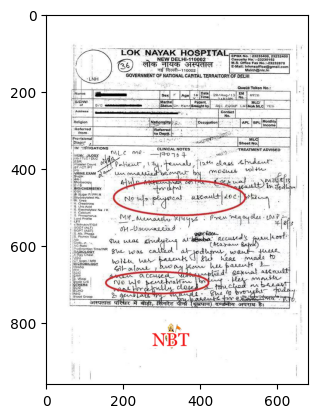

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

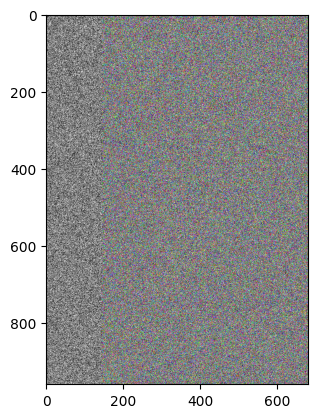

In [ ]:
# Note: As it is implemented, the funciton will assume a 13 character long encryption key.
#       One can tweak this limitation by changing the "key_list" structure at the Logistic functions.
LogisticEncryption("/content/Medical_report.jpg", "abcdefghijklm")
im = Image.open("Medical_report_LogisticEnc.png", 'r')
imshow(np.asarray(im), cmap='gray')

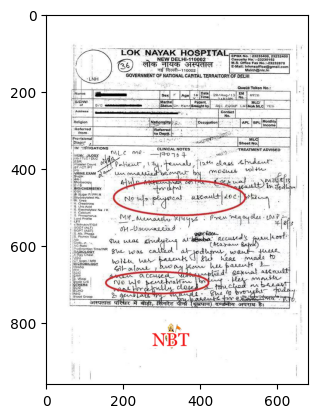

In [ ]:
LogisticDecryption("Medical_report_LogisticEnc.png","abcdefghijklm")
im = Image.open("Medical_LogisticDec.png", 'r')
imshow(np.asarray(im),cmap='gray')